In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("/content/drive/MyDrive/AI and Manchine Learning/mnist_dataset.csv")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
print("Dataset preview:")
df.head()

Dataset preview:


,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print("Dataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel_783
dtypes: int64(785)
memory usage: 359.3 MB
None


In [8]:
#extracting features (x) and target values (y)
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [9]:
X.shape

(60000, 784)

In [10]:
y.shape

(60000,)

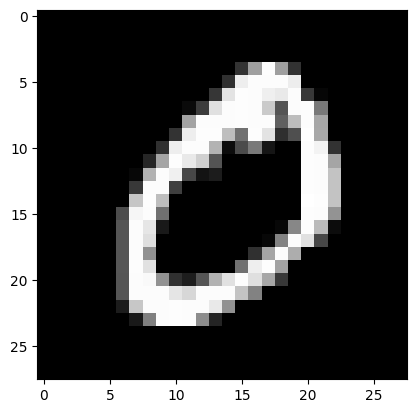

In [11]:
plt.imshow(X[1].reshape(28, 28), cmap='gray')

In [12]:
y[1]

0

In [13]:
X[0].shape

(784,)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
y_train.shape

(48000,)

In [16]:
# Reshape y_train and y_test to be column vectors
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


In [17]:
y_train.shape

(48000, 1)

In [18]:

# Initialize the OneHotEncoder with correct parameter name
encoder = OneHotEncoder(sparse_output=False, categories='auto')

# Fit and transform the training labels, then transform the test labels
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [19]:
print("\nShapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)


Shapes:
X_train: (48000, 784) y_train: (48000, 10)
X_test: (12000, 784) y_test: (12000, 10)


In [20]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

##  **Some Helper Function:**

### Softmax Function:

In [21]:
import numpy as np

def softmax(z):
    """
    Compute the softmax probabilities for a given input matrix.

    Parameters:
    z (numpy.ndarray): Logits (raw scores) of shape (m, n), where
                       - m is the number of samples.
                       - n is the number of classes.

    Returns:
    numpy.ndarray: Softmax probability matrix of shape (m, n), where
                   each row sums to 1 and represents the probability
                   distribution over classes.

    Notes:
    - The input to softmax is typically computed as: z = XW + b.
    - Uses numerical stabilization by subtracting the max value per row.
    """

    # Your Code Here.
    z_shifted = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z_shifted)
    softmax_probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
    return softmax_probs


### Softmax Test Case:

This test case checks that each row in the resulting softmax probabilities sums to 1, which is the fundamental property of softmax.

In [22]:
# Example test case
z_test = np.array([[2.0, 1.0, 0.1], [1.0, 1.0, 1.0]])
softmax_output = softmax(z_test)

# Verify if the sum of probabilities for each row is 1 using assert
row_sums = np.sum(softmax_output, axis=1)

# Assert that the sum of each row is 1
assert np.allclose(row_sums, 1), f"Test failed: Row sums are {row_sums}"

print("Softmax function passed the test case!")

Softmax function passed the test case!


In [23]:
def cross_entropy_loss(y_pred, y):
    """
    Compute the cross-entropy loss for a single sample.

    Parameters:
    y_pred (numpy.ndarray): Predicted probabilities of shape (c,) for a single sample,
                             where c is the number of classes.
    y (numpy.ndarray): True labels (one-hot encoded) of shape (c,), where c is the number of classes.

    Returns:
    float: Cross-entropy loss for the given sample.
    """

    # Avoid log(0) by adding a small value (epsilon)
    epsilon = 1e-15  # for not making (log(0))
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # Calculate cross-entropy loss
    loss = -np.sum(y * np.log(y_pred))

    return loss

In [24]:
def cost_softmax(X, y, W, b):
    """
    Compute the softmax regression cost (cross-entropy loss).

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the number of features.
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c), where c is the number of classes.
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    float: The softmax cost (cross-entropy loss).
    """
    n = X.shape[0]  # Number of samples
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    cost = cross_entropy_loss(y_pred, y)
    return cost

In [25]:
def compute_gradient_softmax(X, y, W, b):
    """
    Compute the gradients of the cost function with respect to weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    tuple: Gradients with respect to weights (d, c) and biases (c,).
    """
    n, d = X.shape #(total_number_of_row, total_columns)
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    grad_W = np.dot(X.T, (y_pred - y)) / n  # Gradient with respect to weights
    grad_b = np.sum(y_pred - y, axis=0) / n  # Gradient with respect to biases

    return grad_W, grad_b


In [26]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """
    Perform gradient descent to optimize the weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    alpha (float): Learning rate.
    n_iter (int): Number of iterations.
    show_cost (bool): Whether to display the cost at intervals.

    Returns:
    tuple: Optimized weights, biases, and cost history.
    """
    cost_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

        # Update weights and biases using the gradients
        W -= alpha * grad_W
        b -= alpha * grad_b

        # Compute and store cost
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)

        # Print cost at regular intervals
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

    return W, b, cost_history


### Prediction Function:

In [27]:
def predict_softmax(X, W, b):
    """
    Predict the class labels for a set of samples using the trained softmax model.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the number of features.
    W (numpy.ndarray): Weight matrix of shape (d, c), where c is the number of classes.
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    numpy.ndarray: Predicted class labels of shape (n,), where each value is the index of the predicted class.
    """
    z = np.dot(X, W) + b  # Compute the scores (logits)
    y_pred = softmax(z)  # Get the probabilities using the softmax function

    # Assign the class with the highest probability
    predicted_classes = np.argmax(y_pred, axis=1)

    return predicted_classes

In [28]:
y_train.shape

(48000, 10)

Iteration 0: Cost = 1149736.612632
Iteration 100: Cost = 582747.027293
Iteration 200: Cost = 143895.863400
Iteration 300: Cost = 137412.689552
Iteration 400: Cost = 218113.846292
Iteration 500: Cost = 137911.223933
Iteration 600: Cost = 133376.355944
Iteration 700: Cost = 157737.261412
Iteration 800: Cost = 138856.799485
Iteration 900: Cost = 167943.940920
Iteration 999: Cost = 240358.253716


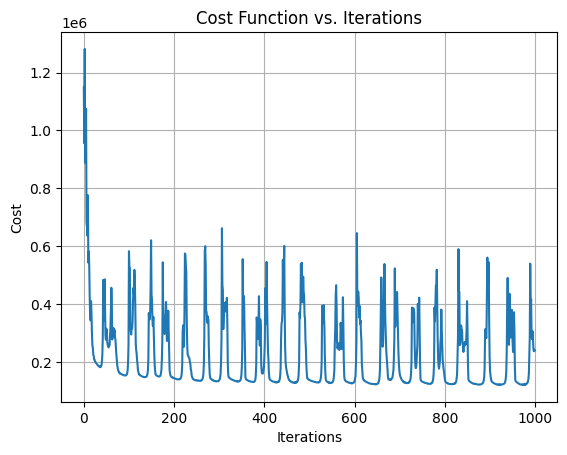

In [29]:
# Initialize the weights and biases
d = X_train.shape[1]  # Number of features
c = y_train.shape[1]  # Number of classes
W = np.random.randn(d, c) * 0.01  # Small random weights
b = np.zeros(c)  # Bias initialized to 0

# Set hyperparameters
alpha = 0.1  # Learning rate
n_iter = 1000  # Number of iterations

# Train the model using gradient descent
W_opt, b_opt, cost_history = gradient_descent_softmax(X_train, y_train, W, b, alpha, n_iter, show_cost=True)

# Plot the cost history to visualize the convergence
plt.plot(cost_history)
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

# Predict on the test set
#y_pred_test = predict_softmax(X_test, W_opt, b_opt)

# Evaluate accuracy
#y_test_labels = np.argmax(y_test, axis=1)  # True labels in numeric form
#accuracy = np.mean(y_pred_test == y_test_labels)
#print(f"Test accuracy: {accuracy * 100:.2f}%")


Confusion Matrix:
[[1129    0    4    4    7    8    3    9   11    0]
 [   0 1260    6   21    2    2    1    5   25    0]
 [   2   15 1015   34   19    7   12   21   49    0]
 [   2    5   18 1132    1   14    3   11   33    0]
 [   1    2    3    5 1140    2    9    6    8    0]
 [  20    9    9   62   15  878    8    8   94    1]
 [  13    3   15    0   27   15 1092    3    9    0]
 [   5    6    9   21   15    1    0 1233    9    0]
 [  12   13    5   47    9   13    8    7 1046    0]
 [  11    8    8   92  265   20    0  427   88  275]]
Precision: 0.87
Recall: 0.85
F1-Score: 0.83


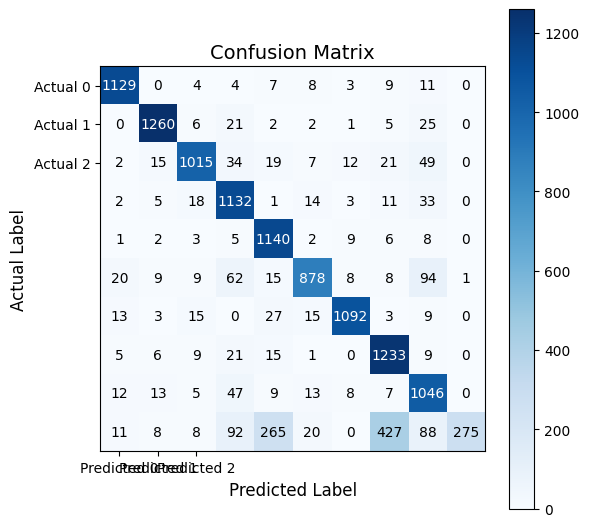

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Evaluation Function
def evaluate_classification(y_true, y_pred):
    """
    Evaluate classification performance using confusion matrix, precision, recall, and F1-score.

    Parameters:
    y_true (numpy.ndarray): True labels
    y_pred (numpy.ndarray): Predicted labels

    Returns:
    tuple: Confusion matrix, precision, recall, F1 score
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Compute precision, recall, and F1-score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return cm, precision, recall, f1

# Predict on the test set
y_pred_test = predict_softmax(X_test, W_opt, b_opt)
# Evaluate accuracy
y_test_labels = np.argmax(y_test, axis=1)  # True labels in numeric form

# Evaluate the model
cm, precision, recall, f1 = evaluate_classification(y_test_labels, y_pred_test)

# Print the evaluation metrics
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Visualizing the Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.imshow(cm, cmap='Blues')  # Use a color map for better visualization

# Set tick labels for the axes
ax.set_xticks(range(3))
ax.set_yticks(range(3))
ax.set_xticklabels([f'Predicted {i}' for i in range(3)])
ax.set_yticklabels([f'Actual {i}' for i in range(3)])

# Add labels to each cell in the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > np.max(cm) / 2 else 'black')

# Add grid lines and axis labels
ax.grid(False)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.colorbar(cax)
plt.show()


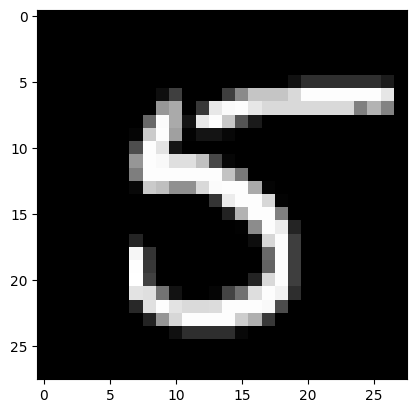

In [33]:
# Reshape the first image to (28, 28)
image = X_train[0].reshape(28, 28)

# Display the image using plt.imshow
plt.imshow(image, cmap='gray')  # 'gray' colormap for grayscale images
plt.show()

In [34]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [35]:

single_image = X_train[0].reshape(1, -1)  # Reshape to (1, 784) as it needs to be 2D


predicted_class = predict_softmax(single_image, W_opt, b_opt)

In [36]:
print("Predicted class for the single image:", predicted_class[0])

Predicted class for the single image: 5
